In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = load_breast_cancer()

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [9]:
cancer_data = pd.DataFrame(data.data)

In [10]:
cancer_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
cancer_target=pd.DataFrame(data.target)

In [12]:
cancer_target.head(10)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [13]:
x = cancer_data

In [14]:
x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [15]:
y = data.target

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [17]:
x.shape

(569, 30)

In [18]:
y.shape

(569,)

In [19]:
y = y.reshape(-1,1)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=44)

In [21]:
x_test.shape

(126, 30)

In [22]:
x_train.shape

(443, 30)

In [23]:
y_test.shape

(126, 1)

In [24]:
y_train.shape

(443, 1)

In [25]:
lg = LogisticRegression()

In [26]:
lg.fit(x_train,y_train)

C:\Users\honey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\honey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
pred = lg.predict(x_test)
print(pred)

[0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1
 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0
 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0]


In [28]:
print("acc score:",accuracy_score(pred,y_test))

acc score: 0.9841269841269841


In [29]:
print(confusion_matrix(pred,y_test))


[[43  0]
 [ 2 81]]


In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.98      1.00      0.99        81

   micro avg       0.98      0.98      0.98       126
   macro avg       0.99      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



In [31]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [32]:
y_pred_prob = lg.predict_proba(x_test)[:,1]

In [33]:
y_pred_prob

array([1.40613157e-02, 6.18454961e-08, 9.69811156e-01, 4.32595832e-10,
       7.42703706e-01, 9.07652181e-01, 9.99228377e-01, 9.36452433e-01,
       5.91393485e-03, 9.95863400e-01, 9.77527465e-01, 9.89549082e-01,
       4.37095856e-04, 8.67112880e-02, 9.99346683e-01, 9.68040128e-01,
       9.96547309e-01, 4.79445965e-04, 4.77751749e-02, 9.99516756e-01,
       9.99723679e-01, 9.36301338e-01, 9.99626942e-01, 9.79653619e-01,
       8.96413661e-01, 6.57951531e-01, 9.93421063e-01, 9.93699236e-01,
       7.50676335e-07, 9.98696852e-01, 9.98812424e-01, 9.97894079e-01,
       9.79415752e-01, 9.98434912e-01, 9.93084007e-01, 9.98858100e-01,
       9.78501369e-01, 9.99262897e-01, 9.99504620e-01, 9.58809717e-01,
       9.35163943e-01, 9.78040945e-01, 5.04554623e-12, 9.42710924e-01,
       9.92931120e-01, 9.82181171e-01, 9.94715294e-01, 9.97387306e-01,
       9.91858522e-01, 6.30574653e-06, 9.52901207e-01, 9.97559558e-01,
       9.99322850e-01, 1.14789688e-02, 9.43601567e-01, 4.63576060e-18,
      

In [34]:
fpr,tpr,theresholds = roc_curve(y_test,y_pred_prob)

In [35]:
fpr

array([0.        , 0.        , 0.        , 0.02222222, 0.02222222,
       0.04444444, 0.04444444, 1.        ])

In [36]:
tpr

array([0.        , 0.01234568, 0.69135802, 0.69135802, 0.87654321,
       0.87654321, 1.        , 1.        ])

In [37]:
theresholds

array([1.99972368e+00, 9.99723679e-01, 9.78040945e-01, 9.77527465e-01,
       9.34234293e-01, 9.25929294e-01, 6.57951531e-01, 7.71383049e-21])

Text(0.5, 1.0, 'logistic Regression')

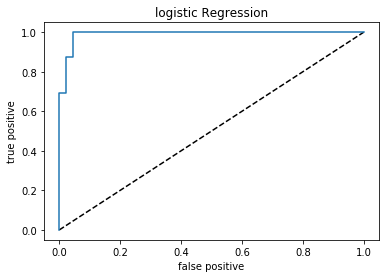

In [38]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logestic Regression')
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.title('logistic Regression')

In [39]:
from sklearn.metrics import roc_auc_score

In [40]:
auc_roc = roc_auc_score(y_test,y_pred_prob)

In [41]:
print(auc_roc)

0.9903978052126201


In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

C:\Users\honey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
predgnb = gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.9682539682539683
[[42  3]
 [ 1 80]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        45
           1       0.96      0.99      0.98        81

   micro avg       0.97      0.97      0.97       126
   macro avg       0.97      0.96      0.97       126
weighted avg       0.97      0.97      0.97       126



In [45]:
y_pred_prob = gnb.predict_proba(x_test)[:,1]
fpr,tpr,theresholds = roc_curve(y_test,y_pred_prob)

Text(0.5, 1.0, 'Gaussian naive byes')

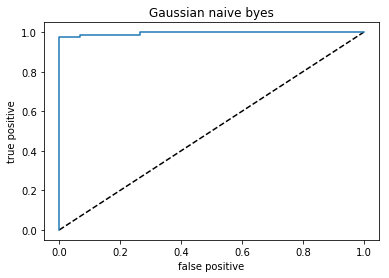

In [46]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.title('Gaussian naive byes')



In [47]:
auc_roc_nb = roc_auc_score(y_test,y_pred_prob)

In [48]:
auc_roc_nb

0.9958847736625515

In [49]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)
svg = sv.predict(x_test)
print(accuracy_score(svg,y_test))
print(confusion_matrix(y_test,svg))
print(classification_report(y_test,svg))

0.6428571428571429
[[ 0 45]
 [ 0 81]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.64      1.00      0.78        81

   micro avg       0.64      0.64      0.64       126
   macro avg       0.32      0.50      0.39       126
weighted avg       0.41      0.64      0.50       126



C:\Users\honey\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\honey\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\honey\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)

In [52]:
knn.fit(x_train,y_train)

C:\Users\honey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [53]:
kn = knn.predict(x_test)
print(accuracy_score(kn,y_test))

0.9603174603174603


In [54]:
print(confusion_matrix(y_test,kn))
print(classification_report(y_test,kn))

[[43  2]
 [ 3 78]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        45
           1       0.97      0.96      0.97        81

   micro avg       0.96      0.96      0.96       126
   macro avg       0.95      0.96      0.96       126
weighted avg       0.96      0.96      0.96       126



In [55]:
y_pred_prob = knn.predict_proba(x_test)[:,1]
fpr,tpr,theresholds = roc_curve(y_test,y_pred_prob)


Text(0.5, 1.0, 'KNeighborsClassifier')

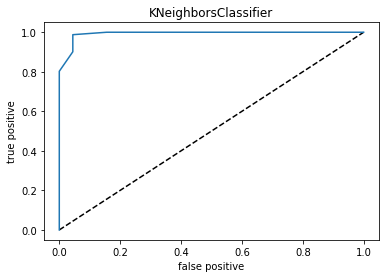

In [56]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.title('KNeighborsClassifier')


In [57]:
auc_roc_knn = roc_auc_score(y_test,y_pred_prob)
print(auc_roc_knn)

0.9927297668038408


In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
det = DecisionTreeClassifier()

In [60]:
det.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
d = det.predict(x_test)
print(accuracy_score(d,y_test))

0.9523809523809523


In [62]:
print(confusion_matrix(y_test,d))
print(classification_report(y_test,d))

[[43  2]
 [ 4 77]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        45
           1       0.97      0.95      0.96        81

   micro avg       0.95      0.95      0.95       126
   macro avg       0.94      0.95      0.95       126
weighted avg       0.95      0.95      0.95       126



In [63]:
y_pred_prob = det.predict_proba(x_test)[:,1]
fpr,tpr,theresholds = roc_curve(y_test,y_pred_prob)


Text(0.5, 1.0, 'DecisionTreeClassifier')

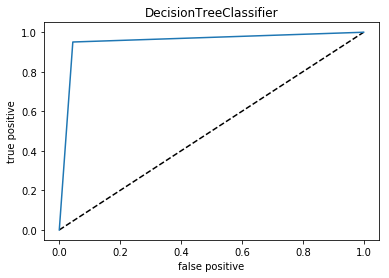

In [64]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.title('DecisionTreeClassifier')


In [65]:
auc_roc_dt = roc_auc_score(y_test,y_pred_prob)
print(auc_roc_dt)

0.9530864197530865


In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
ran = RandomForestClassifier()

In [68]:
ran.fit(x_train,y_train)

C:\Users\honey\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\honey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [69]:
ra = ran.predict(x_test)
print(accuracy_score(ra,y_test))

0.9682539682539683


In [70]:
print(confusion_matrix(y_test,ra))
print(classification_report(y_test,ra))

[[43  2]
 [ 2 79]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        45
           1       0.98      0.98      0.98        81

   micro avg       0.97      0.97      0.97       126
   macro avg       0.97      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126



In [79]:
y_pred_prob = ran.predict_proba(x_test)[:,1]
fpr,tpr,theresholds = roc_curve(y_test,y_pred_prob)


Text(0.5, 1.0, 'randomforest')

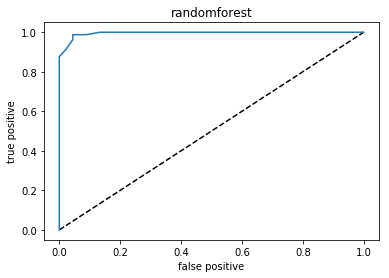

In [80]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.title('randomforest')


In [73]:
auc_roc_rf =roc_auc_score(y_test,y_pred_prob)
print(auc_roc_rf)

0.9954732510288066


In [74]:
import pickle
filename = "random_forest_roc_auc_curve"
fileobj = open(filename,'wb')
pickle.dump(auc_roc_rf,fileobj)
fileobj.close()

In [75]:
filename = "random_forest_roc_auc_curve"
fileobj = open(filename,'rb')
roc_auc = pickle.load(fileobj)
fileobj.close()

In [77]:
print(roc_auc)

0.9954732510288066
